## Final Project Submission

Please fill out:
* Student name: Brian O'Donnell
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!


## Overview
My assigned task was to analyze the King County Housing dataset using linear regression models in order to make profitable business decisions. The business decisions being made are in regards to whether a company can make significant profit by renovating certain aspects of a house and then selling it. The criteria listed in the dataset that I specifically want to look at include: Number of Bedrooms, Number of Bathrooms, Number of Floors, Condition of the house and Square Footage, etc.

In [1]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Pulling up the available data from King County and seeing what it looks like initially.

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [4]:
# Taking a look at some of the numerical data of the dataframe.

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [5]:
# A view of some of the information in our data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Understanding

In the following cells I am going to be taking a closer look at the columns with data that I believe will be useful in creating our models. For example I want to see the dispersion of prices for the houses along with the years they were built, the number of floors/square footage per house and overall condition. Then I want to find the correlation these things have with the sale price. This way we will be able to answer questions such as will a house that has been renovated be more profitable when selling than a new build? 

In [11]:
# Price ranges
df.price.describe()

count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [6]:
# Year built dispersion
df.yr_built.describe()

count   21597.00
mean     1971.00
std        29.38
min      1900.00
25%      1951.00
50%      1975.00
75%      1997.00
max      2015.00
Name: yr_built, dtype: float64

In [12]:
# Info on square footage of living space
df['sqft_living'].describe()

count   21597.00
mean     2080.32
std       918.11
min       370.00
25%      1430.00
50%      1910.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

In [16]:
# Number of houses that fall under each level of condition
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [15]:
# Stats for floor counts
df['floors'].value_counts()

1.00    10673
2.00     8235
1.50     1910
3.00      611
2.50      161
3.50        7
Name: floors, dtype: int64

In [18]:
# Upon first glance one might think this category has something to do with slope of the ground where the house is located,
# but after looking at the King County website we see that it represents the construction quality of the building,
# where 1 is the lowest and 13 the highest which is considered "Mansion Level".
df.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [27]:
drop_cols = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated',
             'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront']
df_corr = df.drop(columns=drop_cols)


In [28]:
df_corr.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,7129300520,221900.00,3,1.00,1180,5650,1.00,Average,7 Average,1955
1,6414100192,538000.00,3,2.25,2570,7242,2.00,Average,7 Average,1951
2,5631500400,180000.00,2,1.00,770,10000,1.00,Average,6 Low Average,1933
3,2487200875,604000.00,4,3.00,1960,5000,1.00,Very Good,7 Average,1965
4,1954400510,510000.00,3,2.00,1680,8080,1.00,Average,8 Good,1987


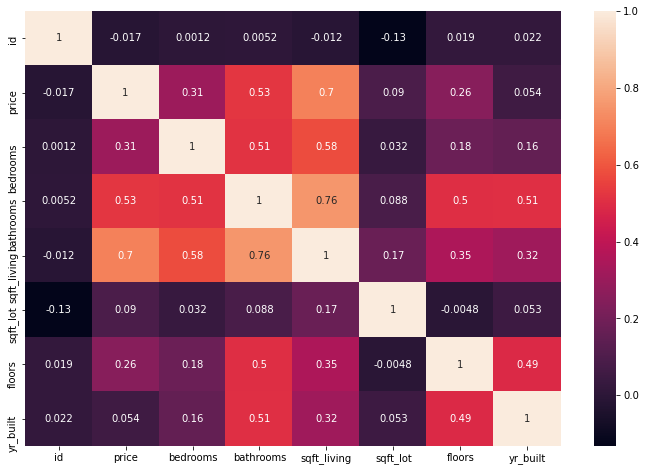

In [29]:
corr = df_corr.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True);

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


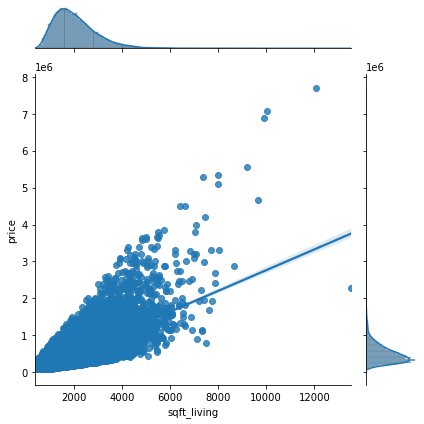

In [45]:
sns.jointplot('sqft_living','price', data=df, kind='reg')
plt.tight_layout()


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


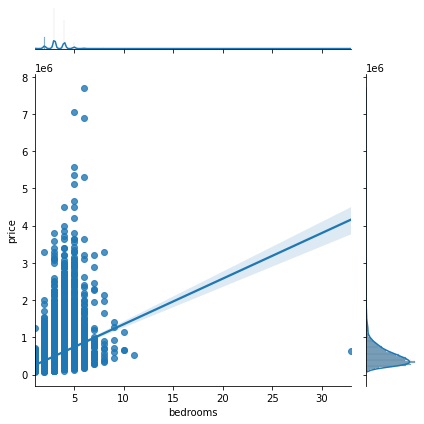

In [49]:
sns.jointplot('bedrooms','price', data=df, kind='reg')
plt.tight_layout()


In [38]:
reno_price = df.groupby(['yr_renovated'])['price'].agg('mean') 
reno_price.sort_values(ascending = True).head(50)


yr_renovated
1950.00   152900.00
1953.00   247500.00
1960.00   252900.00
1967.00   268600.00
1951.00   276000.00
1957.00   312350.00
1976.00   320000.00
1981.00   345638.25
1964.00   356720.00
1940.00   378400.00
1959.00   397500.00
1945.00   398666.67
1948.00   410000.00
1973.00   411500.00
1972.00   413000.00
1955.00   442166.67
1974.00   448750.00
1971.00   451555.00
1934.00   459950.00
1968.00   487100.00
1963.00   497712.50
1944.00   521000.00
1970.00   523044.44
1969.00   529125.00
0.00      530677.54
2011.00   531416.67
1975.00   532300.00
1978.00   536666.67
1946.00   550000.00
1997.00   550078.33
1983.00   562640.00
1986.00   577392.14
1984.00   582687.50
1985.00   613925.00
1962.00   615000.00
1989.00   628517.50
2012.00   633375.00
1977.00   635764.29
2014.00   666537.52
1988.00   666636.36
2013.00   674275.81
1958.00   694626.67
2015.00   697464.29
1992.00   699692.31
1996.00   706813.64
2004.00   739272.73
1998.00   744743.75
1990.00   788090.91
1993.00   793755.00
2000.00